In [157]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [159]:
# Load iris data and store in dataframe

from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [160]:
# Separate X and y data

X = df.drop('target', axis=1)
y = df.target

Number of iris-setosa:  50
Number of iris-virginica :  50
Number of iris-versicolor :  50


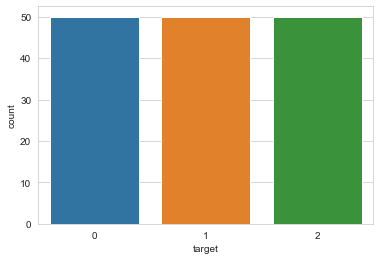

In [161]:
ax = sns.countplot(y,label="Count")      
A, B, C = y.value_counts()
print('Number of iris-setosa: ',A)
print('Number of iris-virginica : ',B)
print('Number of iris-versicolor : ',C)

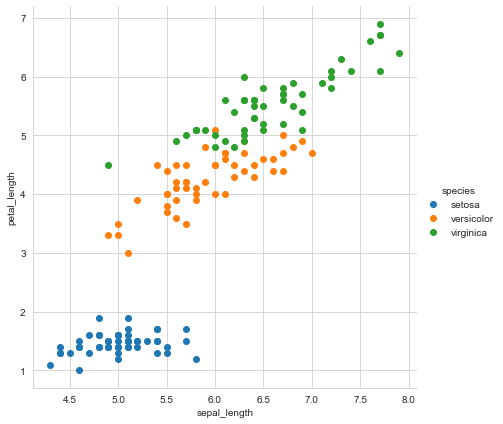

In [174]:
iris = sns.load_dataset('iris')
 
# style used as a theme of graph
# for example if we want black
# graph with grid then write "darkgrid"
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

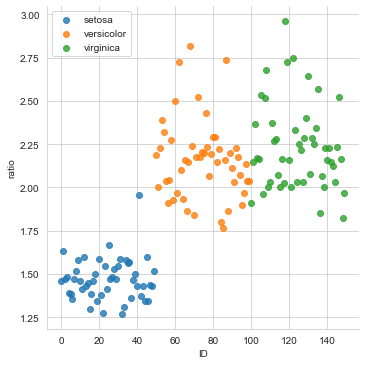

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris["ID"] = iris.index
iris["ratio"] = iris["sepal_length"]/iris["sepal_width"]

sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

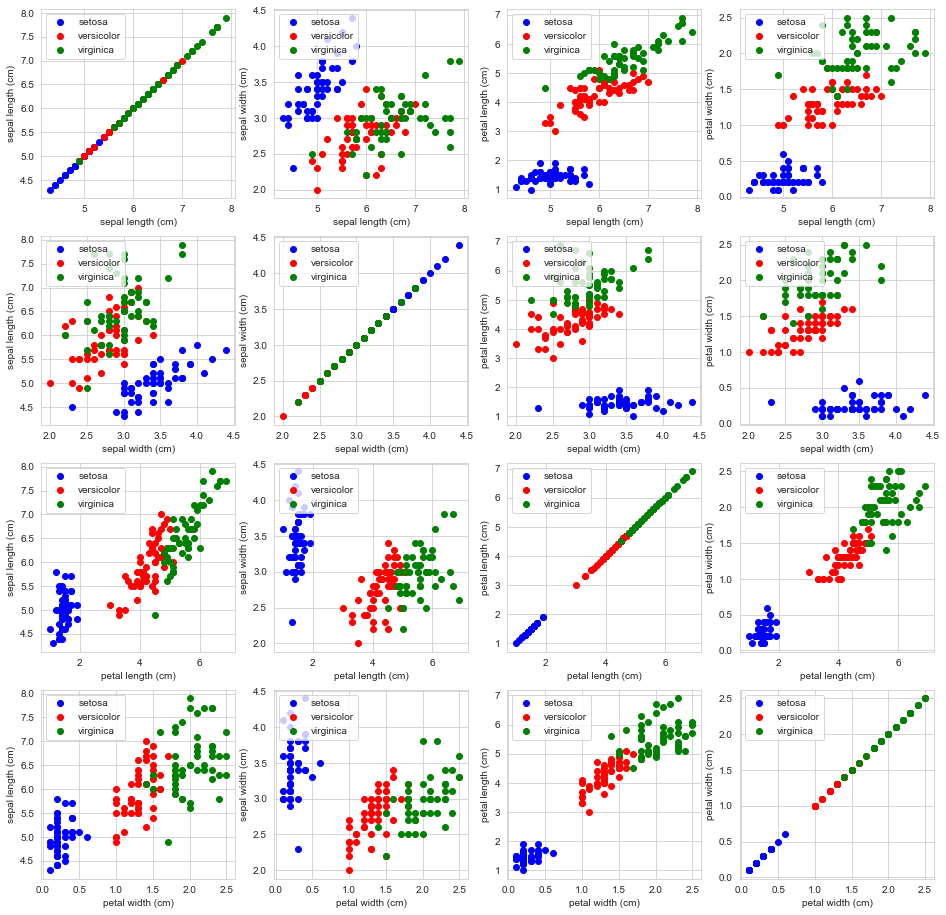

In [172]:
n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green']

for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind, x], 
                             iris.data[iris.target==color_ind, y],
                             label=iris.target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')

In [162]:
# Calculate distance between two points

def euclidean_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance


# Test the function

euclidean_distance(a=X.iloc[0], b=X.iloc[1], p=2)

0.5385164807134502

In [163]:
# Define an arbitrary test point

test_pt = [4.8, 2.7, 2.5, 0.7]

# Calculate distance between test_pt and all points in X

distances = []

for i in X.index:
    
    distances.append(euclidean_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [164]:
# Find the 5 nearest neighbors

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


In [165]:
from collections import Counter

# Create counter object to track the labels

counter = Counter(y[df_nn.index])

# Get most common label of all the nearest neighbors

counter.most_common()[0][0]

1

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclidean_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=2)

print(y_hat_test)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [168]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.9736842105263158


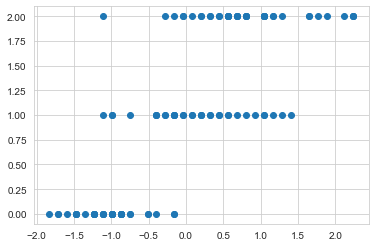

In [169]:
plt.scatter(X_train[:,0],y_train)

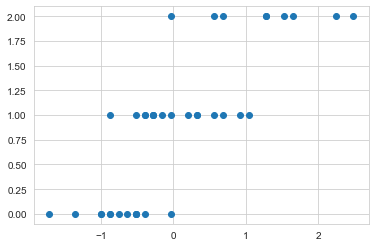

In [170]:
plt.scatter(X_test[:,0],y_test)

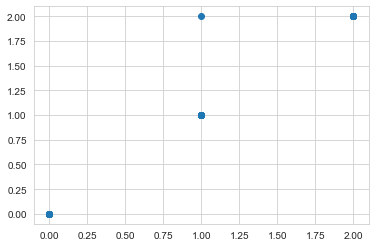

In [171]:
plt.scatter(y_test, y_hat_test)